#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy

#### Setting Stylesheet that we are going to use for plot 


In [2]:
plt.style.use('ggplot')


#### Reading Data

In [3]:
df=pd.read_csv("sample comments 2.csv")

In [4]:
df.head()

,Unnamed: 0,Author_Name,Comment,Like_Count,Author_Channel_ID,Published_at
0,0,CashCow Commissions,How can women be this naïve? Are they stupid o...,0,UC1pn1X6ayGINPoEV9zM_zTQ,2023-09-01T17:10:16Z
1,1,Anung Un Rama,This dude isn’t even a comedian all he does is...,0,UCzWRj6MPrcczUnqLTJA3ARQ,2023-09-01T10:47:00Z
2,2,The Scarlet Slayer,"I think they summer it up best by saying, &quo...",0,UCpQ-74fUd2Ale7JfNmupxaA,2023-09-01T04:31:26Z
3,3,amy bradberry,😂😂😂Matt is such a shit starter 😂😂😂,0,UCkbVfinldrIvuzpPGns5UGw,2023-09-01T02:15:10Z
4,4,tyler Wuthrich,I had a girlfriend who tried pulling this shit...,0,UCGcA5myGlTQh5fn6LxV1W9w,2023-08-31T20:57:36Z


In [5]:
example=df['Comment'][45]

#### Tokenization

In [6]:
tokens=(nltk.word_tokenize(example))
tokens[:10]

['Yeah', 'my', 'dude', 'sorry', 'to', 'break', 'it', 'to', 'ya', 'but']

#### POS Tagging

In [7]:
tags=nltk.pos_tag(tokens)
tags[:10]

[('Yeah', 'UH'),
 ('my', 'PRP$'),
 ('dude', 'NN'),
 ('sorry', 'NN'),
 ('to', 'TO'),
 ('break', 'VB'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('ya', 'VB'),
 ('but', 'CC')]

In [8]:
entities=nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  Yeah/UH
  my/PRP$
  dude/NN
  sorry/NN
  to/TO
  break/VB
  it/PRP
  to/TO
  ya/VB
  but/CC
  your/PRP$
  not/RB
  her/PRP$
  boyfriend/NN
  much/JJ
  longer🤣🤣🤣🤣/NN
  if/IN
  a/DT
  girl/NN
  says/VBZ
  a/DT
  guy/NN
  is/VBZ
  her/PRP$
  “/JJ
  best/JJS
  friend/NN
  ”/NN
  she/PRP
  ’/VBZ
  s/NN
  either/CC
  liked/VBD
  him/PRP
  before/IN
  ,/,
  Fucked/VBD
  him/PRP
  ,/,
  or/CC
  plans/NNS
  on/IN
  it/PRP
  ./.)


#### VADER Sentiment Scoring - uses bag of words approach

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer() 

In [10]:
sia.polarity_scores('I am so happy!!')

{'neg': 0.0, 'neu': 0.304, 'pos': 0.696, 'compound': 0.6785}

In [11]:
sia.polarity_scores('This is the worst thing ever!!')

{'neg': 0.484, 'neu': 0.516, 'pos': 0.0, 'compound': -0.6892}

In [12]:
print(example)

Yeah my dude sorry to break it to ya but your not her boyfriend much longer🤣🤣🤣🤣 if a girl says a guy is her “best friend” she’s either liked him before, Fucked him, or plans on it.


In [13]:
sia.polarity_scores(example)

{'neg': 0.166, 'neu': 0.712, 'pos': 0.122, 'compound': -0.4497}

#### Run the polartity score on the entire dataset!

In [14]:
list=[]
for i in df['Comment']:
    sentiment=sia.polarity_scores(i)
    list.append(sentiment)

In [15]:
vaders=pd.DataFrame(list)
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.join(df,how='left')
vaders=vaders.drop('Unnamed: 0',axis=1)

In [16]:
vaders

,Id,neg,neu,pos,compound,Author_Name,Comment,Like_Count,Author_Channel_ID,Published_at
0,0,0.233,0.719,0.048,-0.7506,CashCow Commissions,How can women be this naïve? Are they stupid o...,0,UC1pn1X6ayGINPoEV9zM_zTQ,2023-09-01T17:10:16Z
1,1,0.035,0.829,0.136,0.6124,Anung Un Rama,This dude isn’t even a comedian all he does is...,0,UCzWRj6MPrcczUnqLTJA3ARQ,2023-09-01T10:47:00Z
2,2,0.000,0.885,0.115,0.8126,The Scarlet Slayer,"I think they summer it up best by saying, &quo...",0,UCpQ-74fUd2Ale7JfNmupxaA,2023-09-01T04:31:26Z
3,3,0.419,0.581,0.000,-0.5574,amy bradberry,😂😂😂Matt is such a shit starter 😂😂😂,0,UCkbVfinldrIvuzpPGns5UGw,2023-09-01T02:15:10Z
4,4,0.184,0.785,0.032,-0.8391,tyler Wuthrich,I had a girlfriend who tried pulling this shit...,0,UCGcA5myGlTQh5fn6LxV1W9w,2023-08-31T20:57:36Z
...,...,...,...,...,...,...,...,...,...,...
95,95,0.000,1.000,0.000,0.0000,Dean Karen,O U C H !!!!!!!!!!,0,UCpriW_H-6PC173QtjKHUZqw,2023-08-04T20:53:02Z
96,96,0.000,0.198,0.802,0.7964,Samuel Hill,that&#39;s some pretty good jokes,0,UCFFj5vhdYSiEmsjhypUn-AQ,2023-08-04T19:40:07Z
97,97,0.000,1.000,0.000,0.0000,Dr. Candido,Biz Markie. “She said he is just a friend”,0,UCvLVTbr4ox_qHfTQ1VnD9_w,2023-08-04T11:04:17Z
98,98,0.162,0.838,0.000,-0.4753,michael versant,its over! Same thing happen to me...she was a...,0,UCtgaqsW_a5-mfGmt2g7jsVA,2023-08-04T04:30:02Z


#### Some Visualizations

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Compound Scores by Authors')

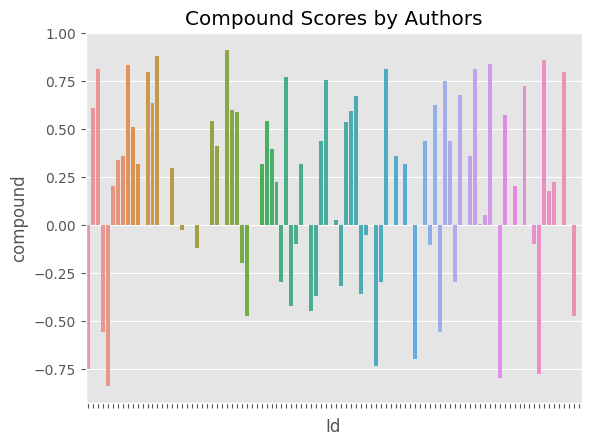

In [17]:
ax=sns.barplot(data=vaders,x='Id',y='compound')
ax.set_xticklabels([])
ax.set_title('Compound Scores by Authors')

#### Positive Scores

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Positive Scores by Authors')

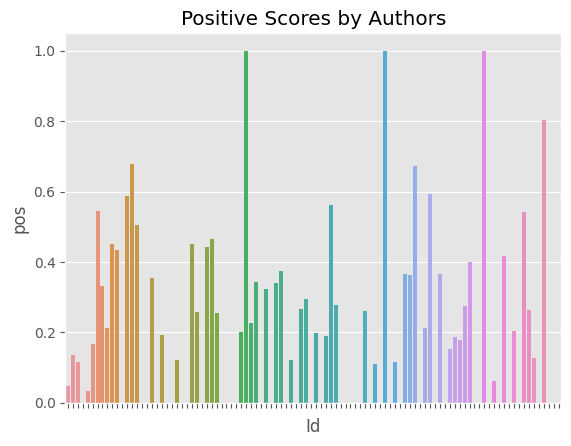

In [18]:
po=sns.barplot(data=vaders,x='Id',y='pos')
po.set_xticklabels([])
po.set_title('Positive Scores by Authors')

#### Negative Scores

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Negative Scores by Authors')

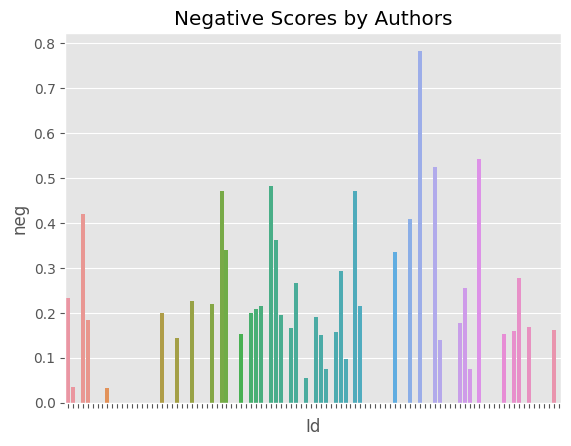

In [19]:
ne=sns.barplot(data=vaders,x='Id',y='neg')
ne.set_xticklabels([])
ne.set_title('Negative Scores by Authors')

#### Neutral Scores

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Neutral Scores by Authors')

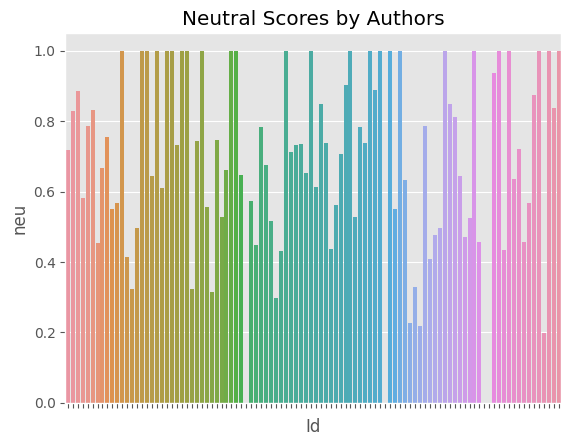

In [20]:
neut=sns.barplot(data=vaders,x='Id',y='neu')
neut.set_xticklabels([])
neut.set_title('Neutral Scores by Authors')

#### Merging all of them

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

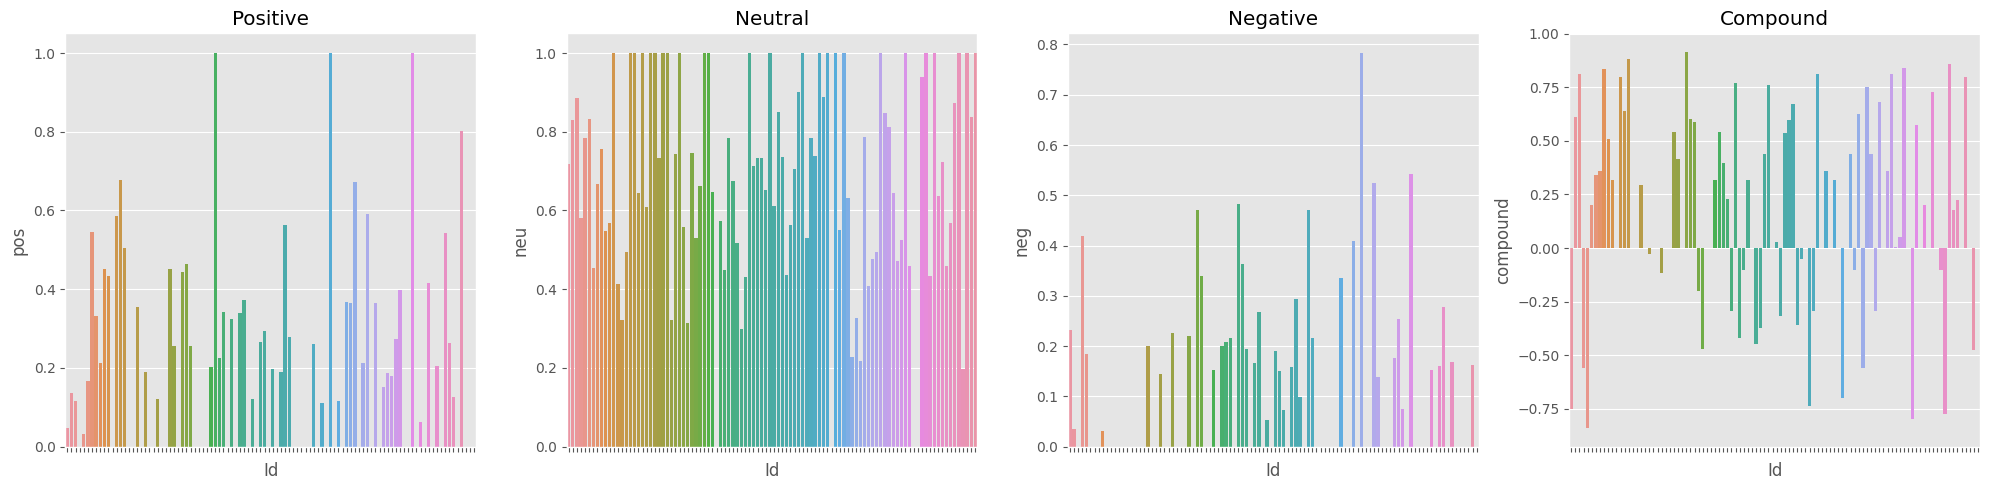

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
sns .barplot(data=vaders, x='Id', y='pos', ax=axs[0])
sns.barplot (data=vaders, x='Id', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Id', y='neg', ax=axs[2])
sns.barplot(data=vaders, x='Id', y='compound', ax=axs[3])
for ax in axs:
    ax.set_xticklabels([])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model Approach

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
#VADER RESULTS ON EXAMPLE
print(example)
print(sia.polarity_scores(example))

Yeah my dude sorry to break it to ya but your not her boyfriend much longer🤣🤣🤣🤣 if a girl says a guy is her “best friend” she’s either liked him before, Fucked him, or plans on it.
{'neg': 0.166, 'neu': 0.712, 'pos': 0.122, 'compound': -0.4497}


In [25]:
#RUN FOR ROBERTA MODEL
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict={
    'roberta_negative' : scores[0],
    'roberta_neutral' : scores[1],
    'roberta_positive' : scores[2]
}
print(scores_dict)

{'roberta_negative': 0.59892887, 'roberta_neutral': 0.34362513, 'roberta_positive': 0.057445984}


In [26]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict={
        'roberta_negative' : scores[0],
        'roberta_neutral' : scores[1],
        'roberta_positive' : scores[2]
    }
    return scores_dict

In [27]:
list1=[]
for i in vaders['Comment']:
    sentiment1=polarity_scores_roberta(i)
    list1.append(sentiment1)

In [28]:
roberts=pd.DataFrame(list1)
# roberts=roberts.reset_index().rename(columns={'index':'Id'})
roberts=roberts.join(vaders,how='left')
# roberts=roberts.drop('Unnamed: 0',axis=1)

In [29]:
roberts

,roberta_negative,roberta_neutral,roberta_positive,Id,neg,neu,pos,compound,Author_Name,Comment,Like_Count,Author_Channel_ID,Published_at
0,0.920501,0.074072,0.005427,0,0.233,0.719,0.048,-0.7506,CashCow Commissions,How can women be this naïve? Are they stupid o...,0,UC1pn1X6ayGINPoEV9zM_zTQ,2023-09-01T17:10:16Z
1,0.749230,0.212430,0.038339,1,0.035,0.829,0.136,0.6124,Anung Un Rama,This dude isn’t even a comedian all he does is...,0,UCzWRj6MPrcczUnqLTJA3ARQ,2023-09-01T10:47:00Z
2,0.335420,0.556821,0.107759,2,0.000,0.885,0.115,0.8126,The Scarlet Slayer,"I think they summer it up best by saying, &quo...",0,UCpQ-74fUd2Ale7JfNmupxaA,2023-09-01T04:31:26Z
3,0.938455,0.050311,0.011234,3,0.419,0.581,0.000,-0.5574,amy bradberry,😂😂😂Matt is such a shit starter 😂😂😂,0,UCkbVfinldrIvuzpPGns5UGw,2023-09-01T02:15:10Z
4,0.860282,0.131390,0.008328,4,0.184,0.785,0.032,-0.8391,tyler Wuthrich,I had a girlfriend who tried pulling this shit...,0,UCGcA5myGlTQh5fn6LxV1W9w,2023-08-31T20:57:36Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.667615,0.254777,0.077609,95,0.000,1.000,0.000,0.0000,Dean Karen,O U C H !!!!!!!!!!,0,UCpriW_H-6PC173QtjKHUZqw,2023-08-04T20:53:02Z
96,0.005848,0.060140,0.934013,96,0.000,0.198,0.802,0.7964,Samuel Hill,that&#39;s some pretty good jokes,0,UCFFj5vhdYSiEmsjhypUn-AQ,2023-08-04T19:40:07Z
97,0.115493,0.824199,0.060308,97,0.000,1.000,0.000,0.0000,Dr. Candido,Biz Markie. “She said he is just a friend”,0,UCvLVTbr4ox_qHfTQ1VnD9_w,2023-08-04T11:04:17Z
98,0.577584,0.377980,0.044436,98,0.162,0.838,0.000,-0.4753,michael versant,its over! Same thing happen to me...she was a...,0,UCtgaqsW_a5-mfGmt2g7jsVA,2023-08-04T04:30:02Z


In [31]:
roberts.columns

Index(['roberta_negative', 'roberta_neutral', 'roberta_positive', 'Id', 'neg',
       'neu', 'pos', 'compound', 'Author_Name', 'Comment', 'Like_Count',
       'Author_Channel_ID', 'Published_at'],
      dtype='object')

#### Comparing Scores between Roberta and VADER Model

d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

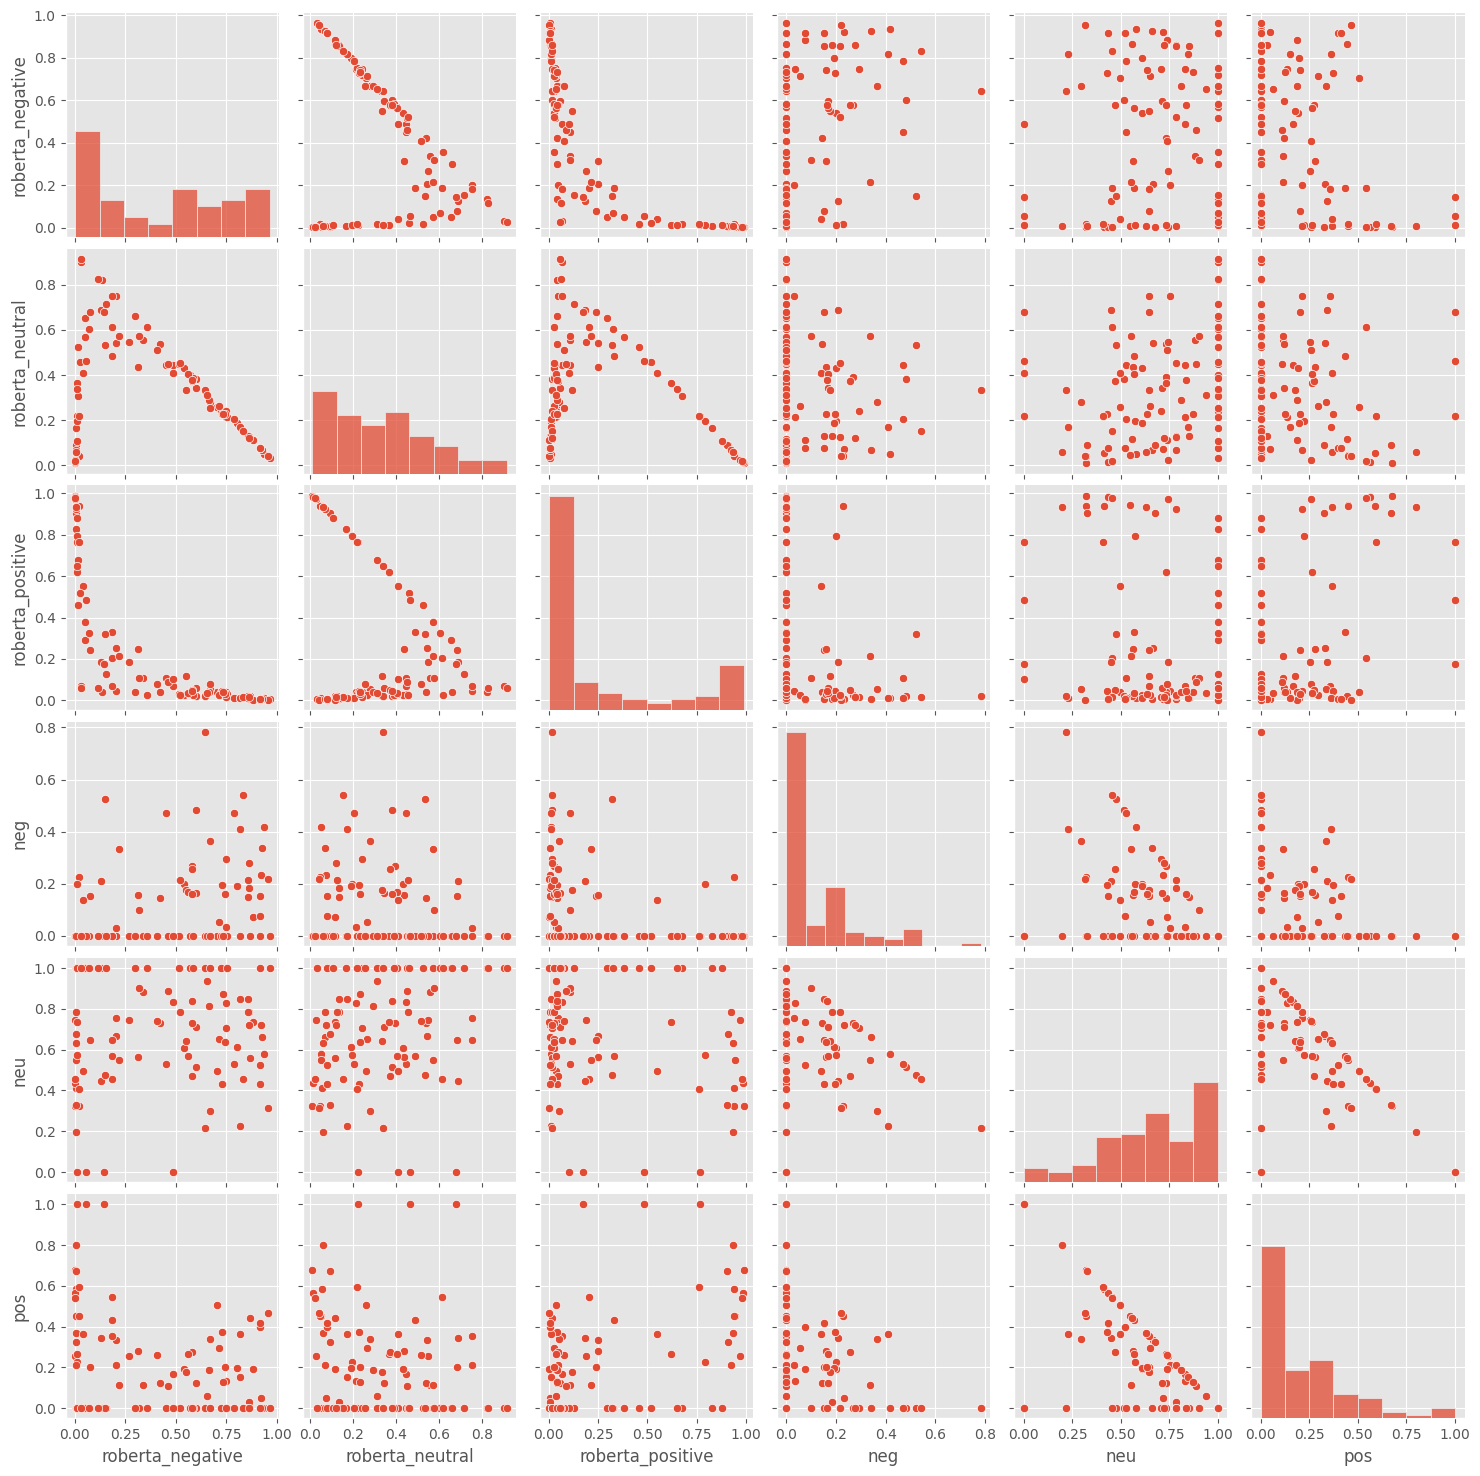

In [32]:
sns.pairplot(data=roberts,
             vars=['roberta_negative', 'roberta_neutral', 'roberta_positive',
                    'neg','neu', 'pos'] )
plt.show()



#### Using Hugging Face Transformers Pipeline

In [34]:
from transformers import pipeline

In [35]:
sentiment_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
d:\VIRTUAL ENVIRONMENT PRACTICE\PBP\env\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Parth\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer m

In [37]:
sentiment_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]